# 2. Data Quality Analysis

This notebook focuses on assessing the quality of the raw Immoweb dataset. We will load the data and perform initial checks for issues like missing values and incorrect data types.

In [29]:
import pandas as pd
import os

In [30]:
# Define the path to the raw data file
raw_data_path = os.path.join('', '..', 'data', 'raw', 'immoweb_intermediate_data.csv')

# Load the data into a pandas DataFrame
try:
    df = pd.read_csv(raw_data_path)
    print('Data loaded successfully for quality analysis.')
except FileNotFoundError:
    print(f'Error: The file was not found at {raw_data_path}')

Data loaded successfully for quality analysis.


In [31]:
# Display basic information about the DataFrame
if 'df' in locals():
    print('DataFrame Info:')
    df.info()
    print('First 5 rows:')
    display(df.head())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75511 entries, 0 to 75510
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              75511 non-null  int64  
 1   price                           75511 non-null  float64
 2   property_type                   75511 non-null  object 
 3   subproperty_type                75511 non-null  object 
 4   region                          75511 non-null  object 
 5   province                        75511 non-null  object 
 6   locality                        75511 non-null  object 
 7   zip_code                        75511 non-null  int64  
 8   latitude                        61413 non-null  float64
 9   longitude                       61413 non-null  float64
 10  construction_year               42120 non-null  float64
 11  total_area_sqm                  67896 non-null  float64
 12  surface_land_sqm

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,fl_garden,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income
0,34221000,225000.0,APARTMENT,APARTMENT,Flanders,Antwerp,Antwerp,2050,51.217172,4.379982,...,0,0.0,0,0,MISSING,231.0,C,GAS,1,922.0
1,2104000,449000.0,HOUSE,HOUSE,Flanders,East Flanders,Gent,9185,51.174944,3.845248,...,0,0.0,0,0,MISSING,221.0,C,MISSING,1,406.0
2,34036000,335000.0,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1070,50.842043,4.334543,...,0,0.0,0,1,AS_NEW,NaN,MISSING,GAS,0,NaN
3,58496000,501000.0,HOUSE,HOUSE,Flanders,Antwerp,Turnhout,2275,51.238312,4.817192,...,0,0.0,0,1,MISSING,99.0,A,MISSING,0,NaN
4,48727000,982700.0,APARTMENT,DUPLEX,Wallonia,Walloon Brabant,Nivelles,1410,NaN,NaN,...,1,142.0,0,0,AS_NEW,19.0,A+,GAS,0,NaN


## T006: Analyze and Convert Data Types

Here we analyze the data types of the columns and convert them to more appropriate types for analysis.

In [32]:
if 'df' in locals():
    # Columns to convert to numeric
    # Note: some might be already numeric, but this ensures consistency and handles non-numeric entries.
    numeric_cols = ['price', 'total_area_sqm', 'surface_land_sqm', 'nbr_frontages', 'nbr_bedrooms', 'terrace_sqm', 'garden_sqm', 'primary_energy_consumption_sqm', 'cadastral_income']
    
    print('--- Converting columns to numeric ---')
    for col in numeric_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Columns to convert to nullable integer (0 or 1)
    boolean_cols = ['fl_furnished', 'fl_open_fire', 'fl_terrace', 'fl_garden', 'fl_swimming_pool', 'fl_floodzone', 'fl_double_glazing']
    
    print('--- Converting flag columns to nullable Integer ---')
    for col in boolean_cols:
        if col in df.columns:
            df[col] = df[col].astype('Int64')
            
    print('--- Conversion complete. Updated DataFrame Info: ---')
    df.info()

--- Converting columns to numeric ---
--- Converting flag columns to nullable Integer ---
--- Conversion complete. Updated DataFrame Info: ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75511 entries, 0 to 75510
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              75511 non-null  int64  
 1   price                           75511 non-null  float64
 2   property_type                   75511 non-null  object 
 3   subproperty_type                75511 non-null  object 
 4   region                          75511 non-null  object 
 5   province                        75511 non-null  object 
 6   locality                        75511 non-null  object 
 7   zip_code                        75511 non-null  int64  
 8   latitude                        61413 non-null  float64
 9   longitude                       61413 non-null  float64
 10  constructio

## T007: Identify and Quantify Missing Values

To understand the scope of data cleaning required, we'll identify the number and proportion of missing values in each column.

In [33]:
if 'df' in locals():
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    
    missing_df = pd.DataFrame({
        'missing_count': missing_values,
        'missing_percentage': missing_percentage
    })
    
    # Filter to show only columns with missing values and sort
    missing_df = missing_df[missing_df['missing_count'] > 0].sort_values(by='missing_percentage', ascending=False)
    
    print('Proportion of missing values per column:')
    display(missing_df)

Proportion of missing values per column:


,missing_count,missing_percentage
cadastral_income,44967,59.550264
surface_land_sqm,36256,48.014197
construction_year,33391,44.220047
primary_energy_consumption_sqm,26567,35.182953
nbr_frontages,26346,34.890281
latitude,14098,18.670128
longitude,14098,18.670128
terrace_sqm,13140,17.401438
total_area_sqm,7615,10.084623
garden_sqm,2939,3.892148


## T008: Handle Missing Values

Based on the analysis above, we will implement a strategy to handle missing values. For this initial pass, we will drop columns with a very high percentage of missing data and impute others.

In [34]:
if ('df' in locals()) and ('missing_df' in locals()):
    # Strategy 1: Drop columns with more than 50% missing values
    cols_to_drop = missing_df[missing_df['missing_percentage'] > 50].index
    df.drop(columns=cols_to_drop, inplace=True)
    print(f'Dropped columns: {list(cols_to_drop)}')
    
    # Strategy 2: Impute key numeric columns with the median
    cols_to_impute = ['surface_land_sqm', 'construction_year', 'nbr_frontages', 'primary_energy_consumption_sqm', 'terrace_sqm', 'latitude', 'longitude']
    print(f'Imputing columns with median: {cols_to_impute}')
    for col in cols_to_impute:
        if col in df.columns:
            median_val = df[col].median()
            df[col] = df[col].fillna(median_val)
            
    # Verify the changes
    print('--- Missing values after handling: ---')
    remaining_missing = df.isnull().sum()
    print(remaining_missing[remaining_missing > 0])

Dropped columns: ['cadastral_income']
Imputing columns with median: ['surface_land_sqm', 'construction_year', 'nbr_frontages', 'primary_energy_consumption_sqm', 'terrace_sqm', 'latitude', 'longitude']
--- Missing values after handling: ---
total_area_sqm    7615
garden_sqm        2939
dtype: int64


## T009: Identify and Analyze Outliers

Now, we will identify and analyze outliers for key numerical variables. Outliers can significantly affect the results of our analysis, so it's important to detect them. We will use box plots for visualization.

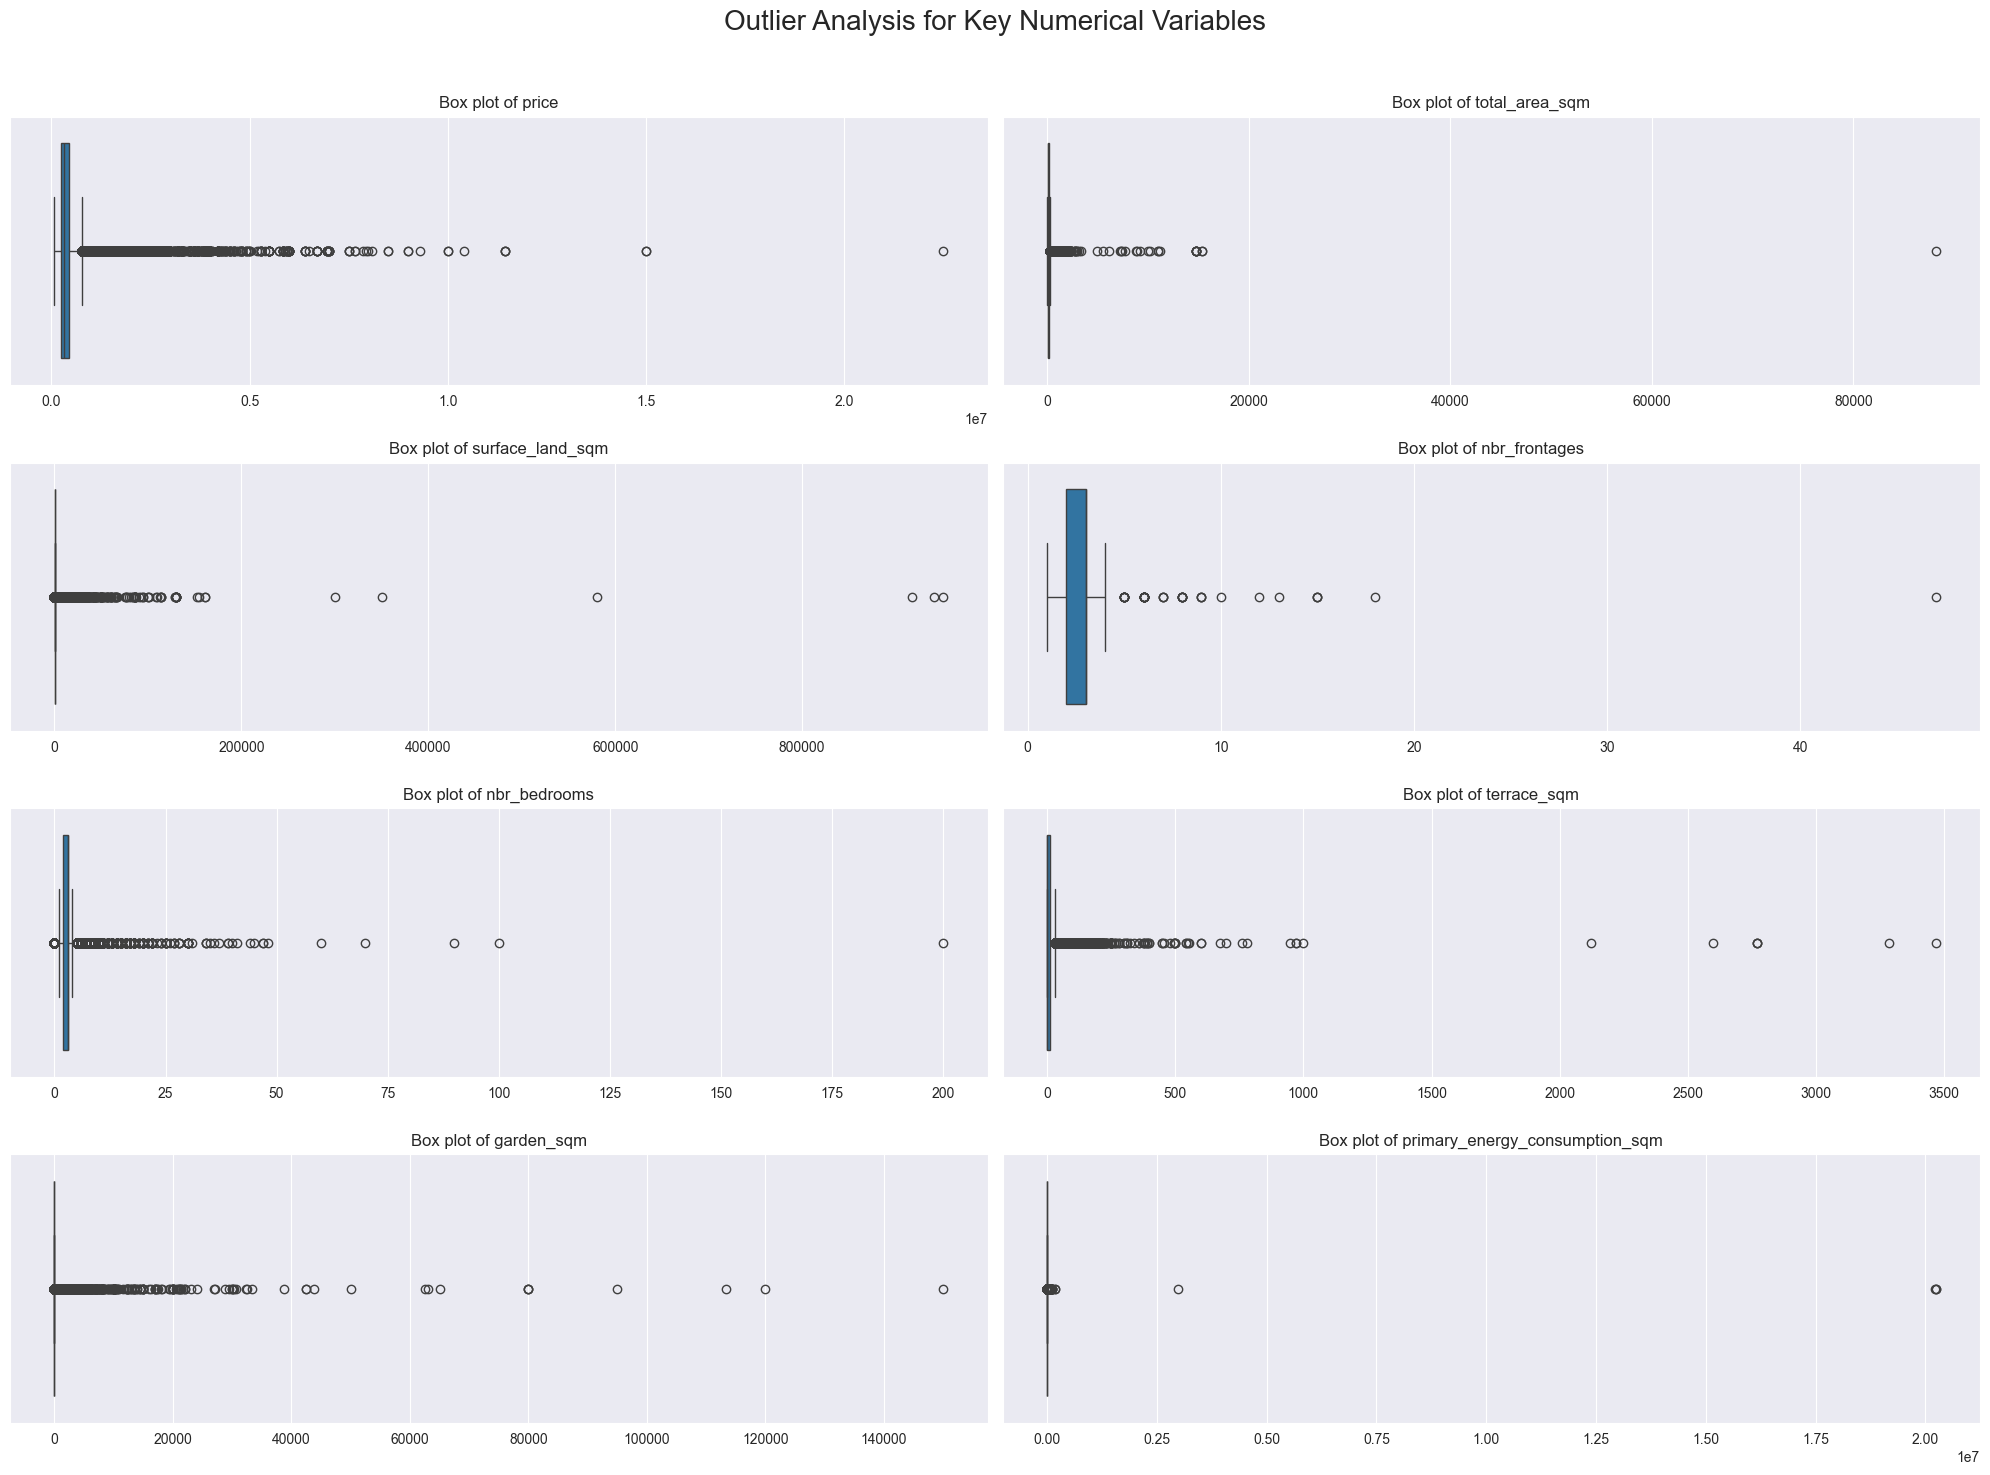

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'df' in locals():
    # Select key numerical variables for outlier analysis
    outlier_cols = ['price', 'total_area_sqm', 'surface_land_sqm', 'nbr_frontages', 'nbr_bedrooms', 'terrace_sqm', 'garden_sqm', 'primary_energy_consumption_sqm']
    
    # Set up the figure for plotting
    plt.figure(figsize=(20, 15))
    plt.suptitle('Outlier Analysis for Key Numerical Variables', fontsize=20)
    
    # Generate a box plot for each variable
    for i, col in enumerate(outlier_cols):
        if col in df.columns:
            plt.subplot(4, 2, i + 1)
            sns.boxplot(x=df[col])
            plt.title(f'Box plot of {col}')
            plt.xlabel('')
    
    plt.tight_layout(rect=(0, 0, 1, 0.96))
    plt.show()

## T010: Implement Strategy for Handling Outliers

Based on the box plots, we see that some variables have extreme outliers. We will handle these by capping the values at the 99th percentile. This approach is less drastic than removing the outliers altogether and will help to reduce their skewing effect on our analysis.

--- Capping outliers at the 99th percentile ---
Capped outliers for price at 2195000.00
Capped outliers for total_area_sqm at 680.00
Capped outliers for surface_land_sqm at 7000.00
Capped outliers for terrace_sqm at 90.00
Capped outliers for garden_sqm at 1800.00


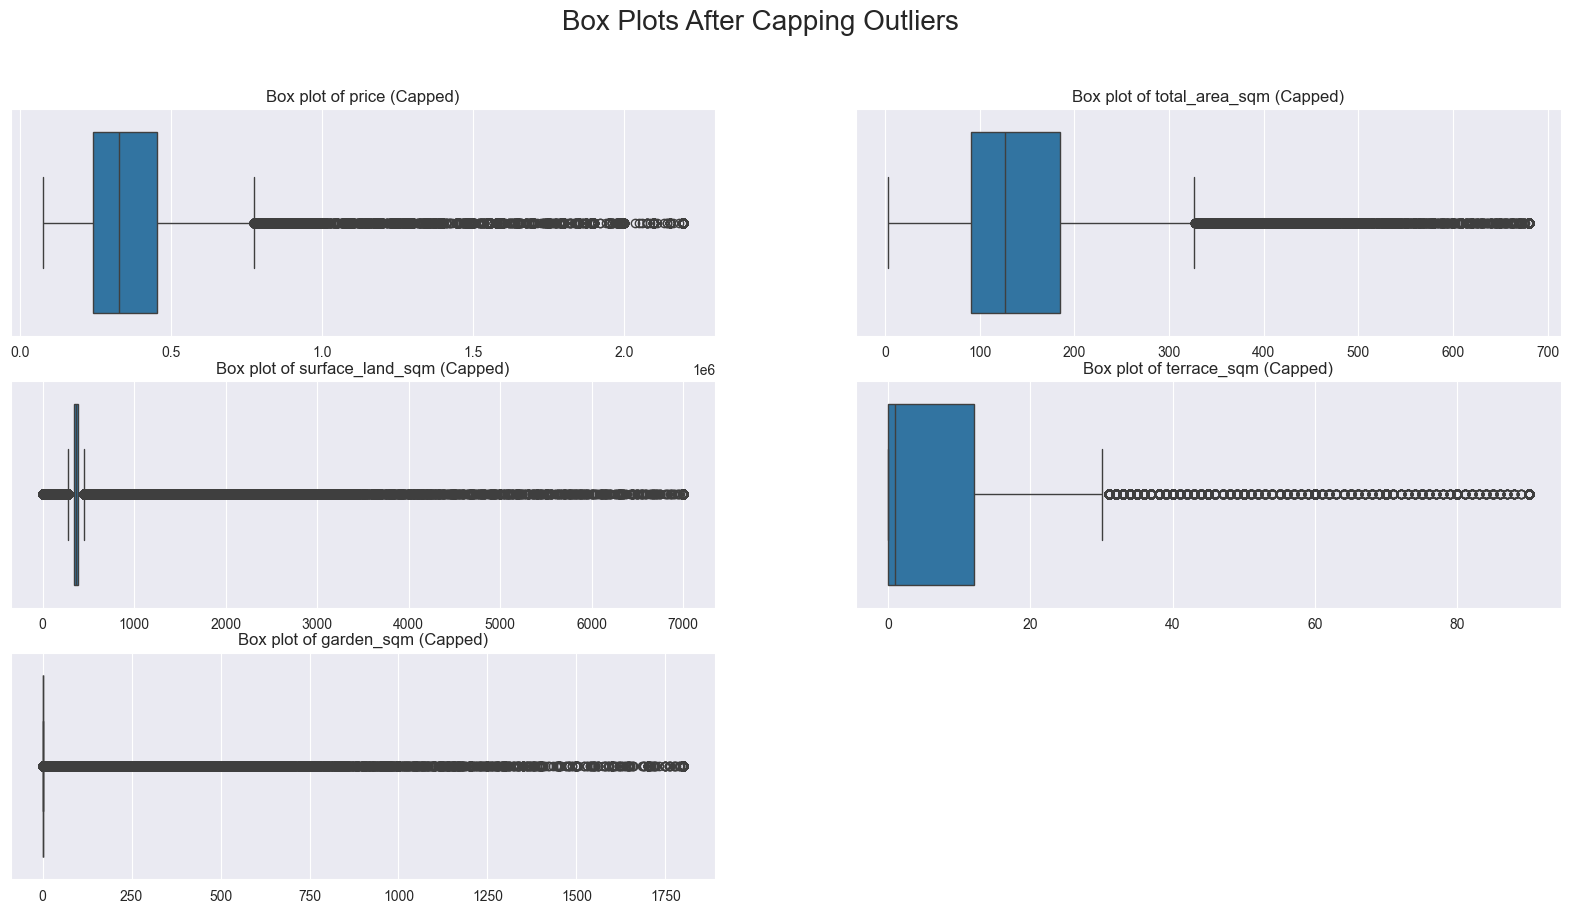

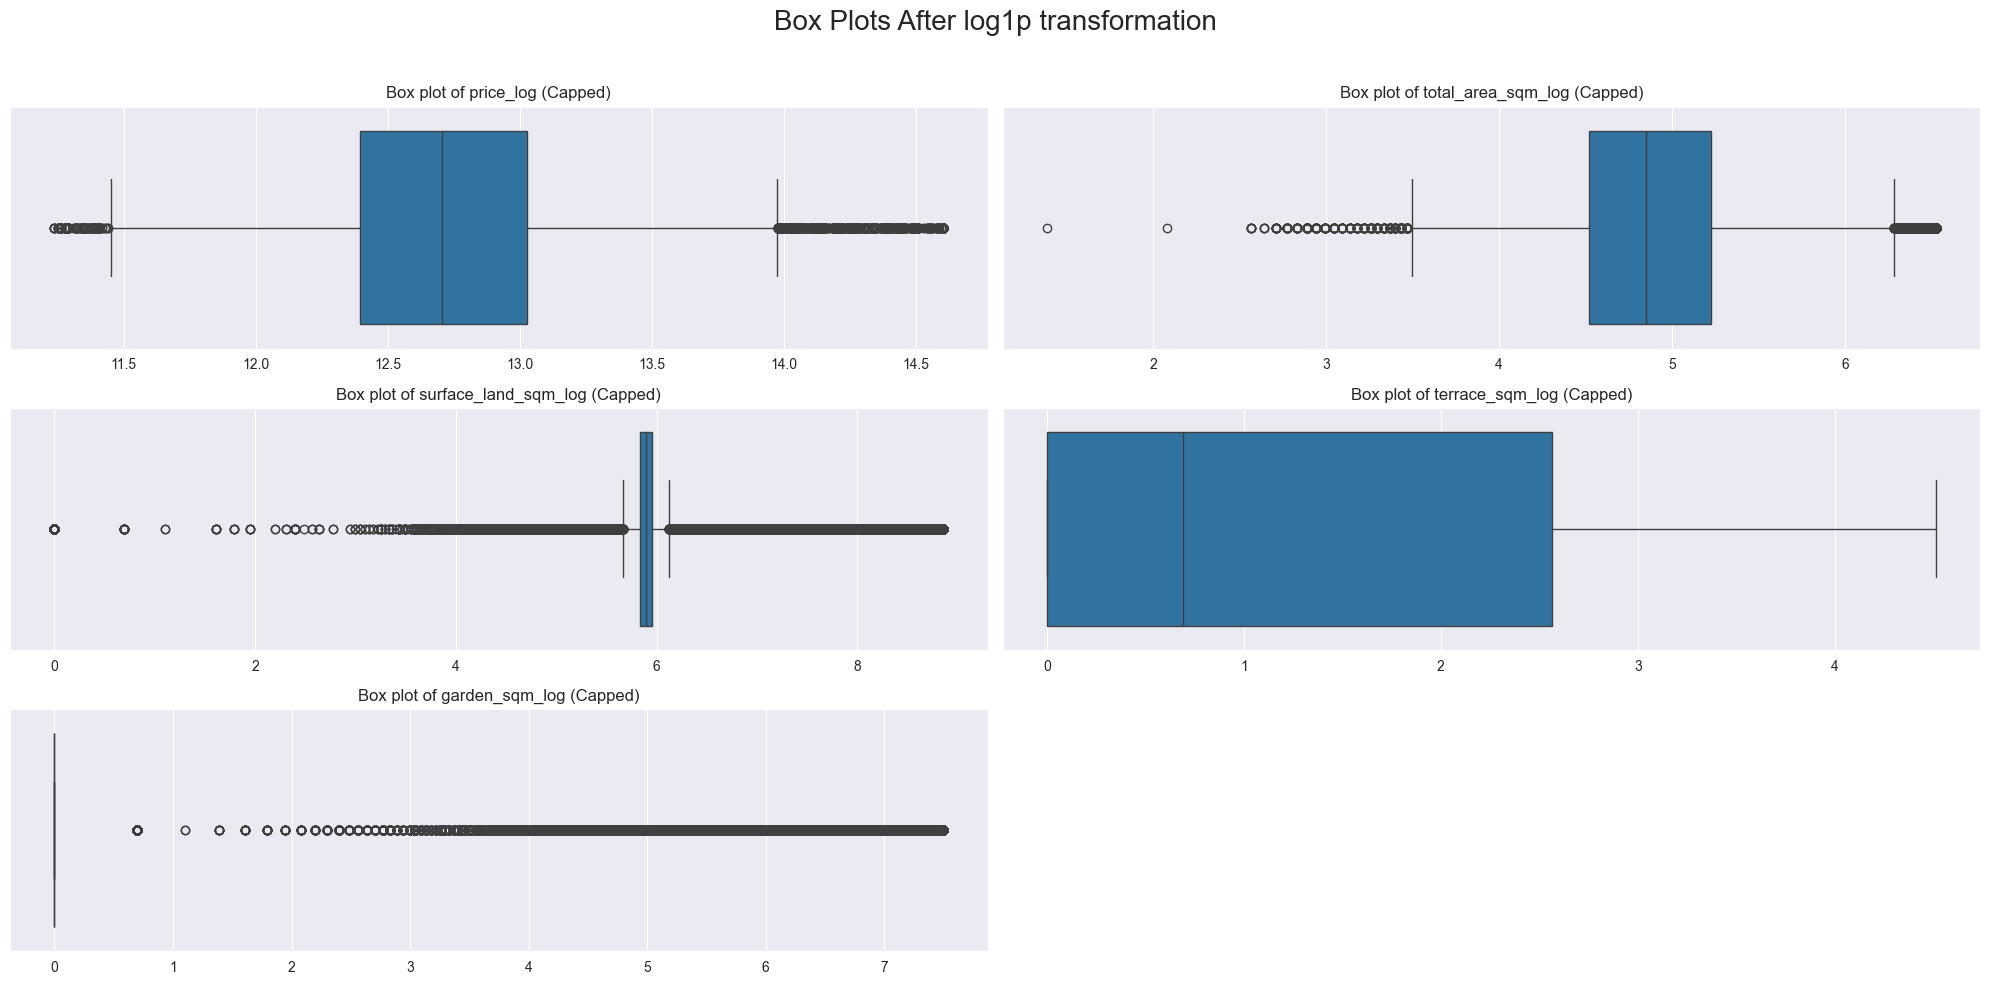

In [36]:
import numpy as np

if 'df' in locals():
    # Columns to handle outliers for
    cols_to_cap = ['price', 'total_area_sqm', 'surface_land_sqm', 'terrace_sqm', 'garden_sqm']
    
    print('--- Capping outliers at the 99th percentile ---')
    for col in cols_to_cap:
        if col in df.columns:
            # Calculate the 99th percentile
            percentile_99 = df[col].quantile(0.99)
            
            # Cap the values at the 99th percentile
            df[col] = df[col].apply(lambda x: min(x, percentile_99))
            
            print(f'Capped outliers for {col} at {percentile_99:.2f}')

            df[f'{col}_log'] = np.log1p(df[col])
            
    # Display the box plots again to see the effect of capping

    plt.figure(figsize=(20, 10))
    plt.suptitle('Box Plots After Capping Outliers', fontsize=20)

    for i, col in enumerate(cols_to_cap):
        if col in df.columns:
            plt.subplot(3, 2, i + 1)
            sns.boxplot(x=df[col])
            plt.title(f'Box plot of {col} (Capped)')
            plt.xlabel('')
    plt.figure(figsize=(20, 10))

    # Display the box plots again to see the effect of log1p transformation

    plt.suptitle('Box Plots After log1p transformation', fontsize=20)

    for i, col in enumerate(cols_to_cap):
        log_col = f"{col}_log"
        if log_col in df.columns:
            plt.subplot(3, 2, i + 1)
            sns.boxplot(x=df[log_col])
            plt.title(f'Box plot of {log_col} (Capped)')
            plt.xlabel('')

    plt.tight_layout(rect=(0, 0, 1, 0.96))
    plt.show()

## T011: Create Processed Dataset

After handling missing values and outliers, we will save the cleaned and processed DataFrame to a new CSV file in the `data/processed/` directory. This dataset will be used for subsequent exploratory data analysis and modeling.

In [37]:
if 'df' in locals():
    processed_data_path = os.path.join('', '..', 'data', 'processed', 'immoweb_processed_data.csv')
    
    # Ensure the processed data directory exists
    os.makedirs(os.path.dirname(processed_data_path), exist_ok=True)
    
    # Save the processed DataFrame to a CSV file
    df.to_csv(processed_data_path, index=False)
    print(f'Processed data saved to {processed_data_path}')

Processed data saved to ..\..\data\processed\immoweb_processed_data.csv
